

<center><img src="https://image.freepik.com/free-photo/red-wine-with-grapes-old-barrel_220768-15.jpg" width=600/></center>
<h1> Red Red Wine: Exploring chemical attributes of red wine </h1>
<b> Author: </b> Bay Jin Wee

<h2><font color="darkred"> 1. Topic Coverage </font> </h2>

The objective is to study whether certain chemical properties in red wine affects the sensory perception of red wine quality and understand the relation between its various chemical properties. These chemical properties may be referred to as 'features' in the remaining of this report.

<br>In addition, an attempt to predict pH and quality using a straightforward linear regression, as well as using a K-means clustering to potentially spot clusters within the red wine samples will be performed.</br>

<br>Finally, to demonstrate the process of interpreting and applying the data analysis outcomes, any interesting data analysis outcomes and thought processes while analysing the outcomes will be extended to real-world applications whenever possible.</br>

<h2><font color="darkred"> 2. Selected Dataset & Data Preparation </font> </h2>

<h3> Selected Dataset </h3>
Data portal: UCI Machine Learning Repository, 
URL: <a href="url">https://archive.ics.uci.edu/ml/datasets/Wine+Quality</a><br>
<br>
Source dataset: Kindly refer to the 'winequality-red.csv' file in the above URL 
<br>Name of dataset: Red wine quality</br>
<br>Each row entry represents a red wine sample with its features and a quality rating provided by sensory assessors.</br>

Data Preparation:
<ul>
    <li> The dataset is clean, with no null values in the columns. The data type in each column is also standardized.</li>
    <li> The variables in each columns are numerical/continuous variables. As there are no categorical variables, no integer encoding is required prior to implementing machine learning.</li>
    <li> For the 'quality' column, there are quite a number of distinct wine ratings. Binning / Grouping will be implemented in order to group the wine quality into smaller groups that would be more conducive for data analysis.</li>
    <li> Screening will be performed for any potential outliers, and if present, they will be removed from the dataset.</li>
</ul>

<h3> Data Description for Each Column in Dataset</h3>

> <table>
> <tr>
    >    <th>Column Name</th><th>Description</th><th>Variable Type</th>
></tr>
><tr>
>    <td>Fixed Acidity</td><td>Concentration of Tartaric acid (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Volatile Acidity</td><td>Concentration of Acetic acid (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Citric Acid</td><td>Concentration of Citric acid (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Residual Sugar</td><td>Concentration of Residual sugar (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Chlorides</td><td>Concentration of Chlorides (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Free Sulfur Dioxide</td><td>Concentration of Free Sulfur Dioxide (mg/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Total Sulfur Dioxide</td><td>Concentration of Total Sulfur Dioxide (mg/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Density</td><td>Density of wine (g/cm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>pH</td><td>pH level</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Sulphates</td><td>Concentration of Sulphates (g/dm^3)</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Alcohol</td><td>Volume % of alcohol</td><td>Numerical; continuous</td>
></tr>
><tr>
>    <td>Quality</td><td>Perceived wine quality rating (0-10; with 10 being the highest quality). <br> Wine quality is evaluated by sensory assessors through a 'blindfolded' taste test </td><td>Numerical; ordinal</td>
></tr>
></table>

<h2><font color="darkred"> 3. Methodology </font> </h2>

In [29]:
import warnings
warnings.filterwarnings('ignore')

<b>Import Libraries</b>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Plot static image in Jupyter notebook. otherwise a separate window will open
%matplotlib inline

# Settings throughout the notebook
sns.set(style='whitegrid', palette='Set3')

In [32]:
!pip install --pre -f http://nightly.scikit-learn.org scikit-learn

Looking in links: http://nightly.scikit-learn.org


<b>Import Dataset</b>

In [33]:
redwines_df=pd.read_csv("winequality-red.csv")
#rename columns:
redwines_df.columns=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"]
display(redwines_df.head(20))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<b>Re-binning and creating new 'grouped_quality' column</b>

In [34]:
redwines_df["grouped_quality"]=pd.cut(redwines_df["quality"],bins=[0,4,6,10],labels=['low','medium','high']) #create new column "grouped_quality"
display(redwines_df.head(20))

#'quality' is re-grouped to smaller groupings
#(0,4] = low
#(4,6] = medium
#(6,10] = high

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,grouped_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium


<b>Check datatypes of all columns</b>

In [35]:
display(redwines_df.dtypes)

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
grouped_quality         category
dtype: object

<b>Screen for outliers</b>

A 'quick and dirty' way to screen for outliers is by using the describe function. In particular, max and min values are useful values to screen.

In [36]:
redwines_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<b>Outlier anomaly screening visualization</b>

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol


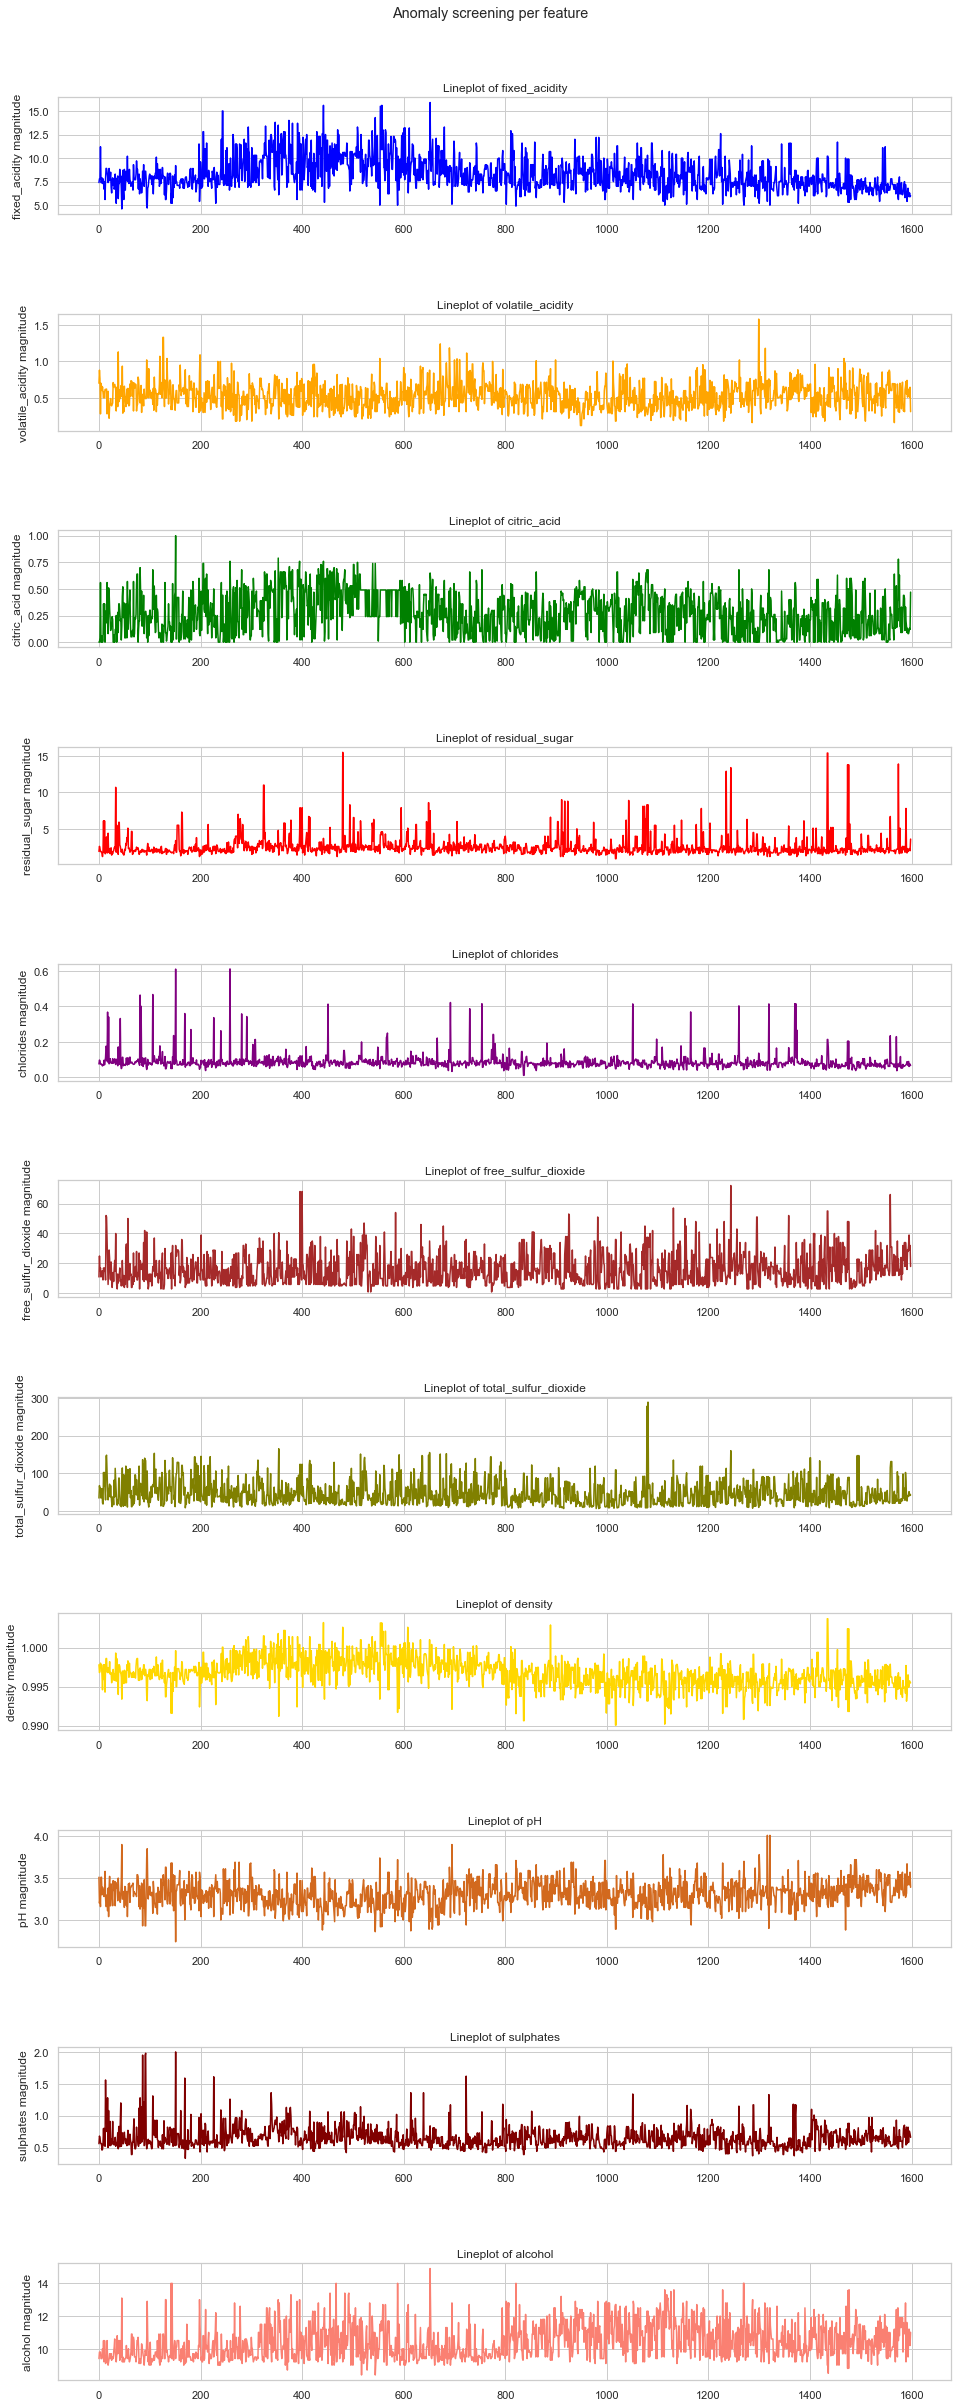

In [37]:
colors = ['blue','orange','green','red','purple','brown','olive','gold','chocolate','maroon','salmon'] # all the colors of the plots
feature_keys_anomaly_detection= ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
plotting_index = 0 # initialize
feature_index = 0 #initialize
color_index = 0 #initialize

fig, axes = plt.subplots(nrows=11,figsize=(16,42))   # 11 rows (one for each feature); manually alter figsize parameter to modify output visual's size (do tgt with hspace below)
#the above line creates the exoskeletion in which to overlay the 11 lineplots

for feature_df_anomaly_detection in all_features_anomaly_detection:   # plot for each of the 11 dataframes within "all_features" list created earlier
    
    feature_name = feature_keys_anomaly_detection[feature_index]
    plotting_color = colors[color_index]
    print(feature_name)
    
    # Get each row's Axis, for each row there is only 1 columns therefore ax1
    ax1 = axes[plotting_index]

    # plot the lineplot for each feature
    ax1.plot(redwines_df[feature_name],color=plotting_color) # <fill in the code>
    ax1.set_title('Lineplot of ' +  feature_name)
    ax1.set_ylabel(feature_name + ' magnitude')
    
    plotting_index += 1 #to move on to the next row in the 11x2 exoskeleton
    feature_index += 1 #to move on to the next feature to explore
    color_index += 1
    
plt.subplots_adjust(hspace=0.85) #adjust sizing of output visualization (use tgt with figsize parameter above)
plt.suptitle('Anomaly screening per feature',y=0.91)

plt.savefig('anomaly_screening.png')
plt.show()

<b>Outlier anomaly screening conclusion</b>

From the lineplots per feature, there are no obvious anomalous data. This just proves that the original dataset is really in a 'clean' state. Therefore, no data points are treated as anomalous and all data points shall be retained for the remaining steps of data analysis.

<h3><font color="darkred"> Exploratory Data Analysis (EDA) </h3>

<b>Distribution plots of red wines' features</b>

In [38]:
feature_keys= ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
all_features = []  # a list of dataframes, one for each feature

for feature in feature_keys:
    interested_feature= [feature,"grouped_quality"] # specify the grouped_quality (low/medium/high)
    temp_df= redwines_df[interested_feature] # specify the columns of interest for following EDA plots
    all_features.append(temp_df)
    
display(all_features)

[      fixed_acidity grouped_quality
 0               7.4          medium
 1               7.8          medium
 2               7.8          medium
 3              11.2          medium
 4               7.4          medium
 ...             ...             ...
 1594            6.2          medium
 1595            5.9          medium
 1596            6.3          medium
 1597            5.9          medium
 1598            6.0          medium
 
 [1599 rows x 2 columns],
       volatile_acidity grouped_quality
 0                0.700          medium
 1                0.880          medium
 2                0.760          medium
 3                0.280          medium
 4                0.700          medium
 ...                ...             ...
 1594             0.600          medium
 1595             0.550          medium
 1596             0.510          medium
 1597             0.645          medium
 1598             0.310          medium
 
 [1599 rows x 2 columns],
       citric_acid g

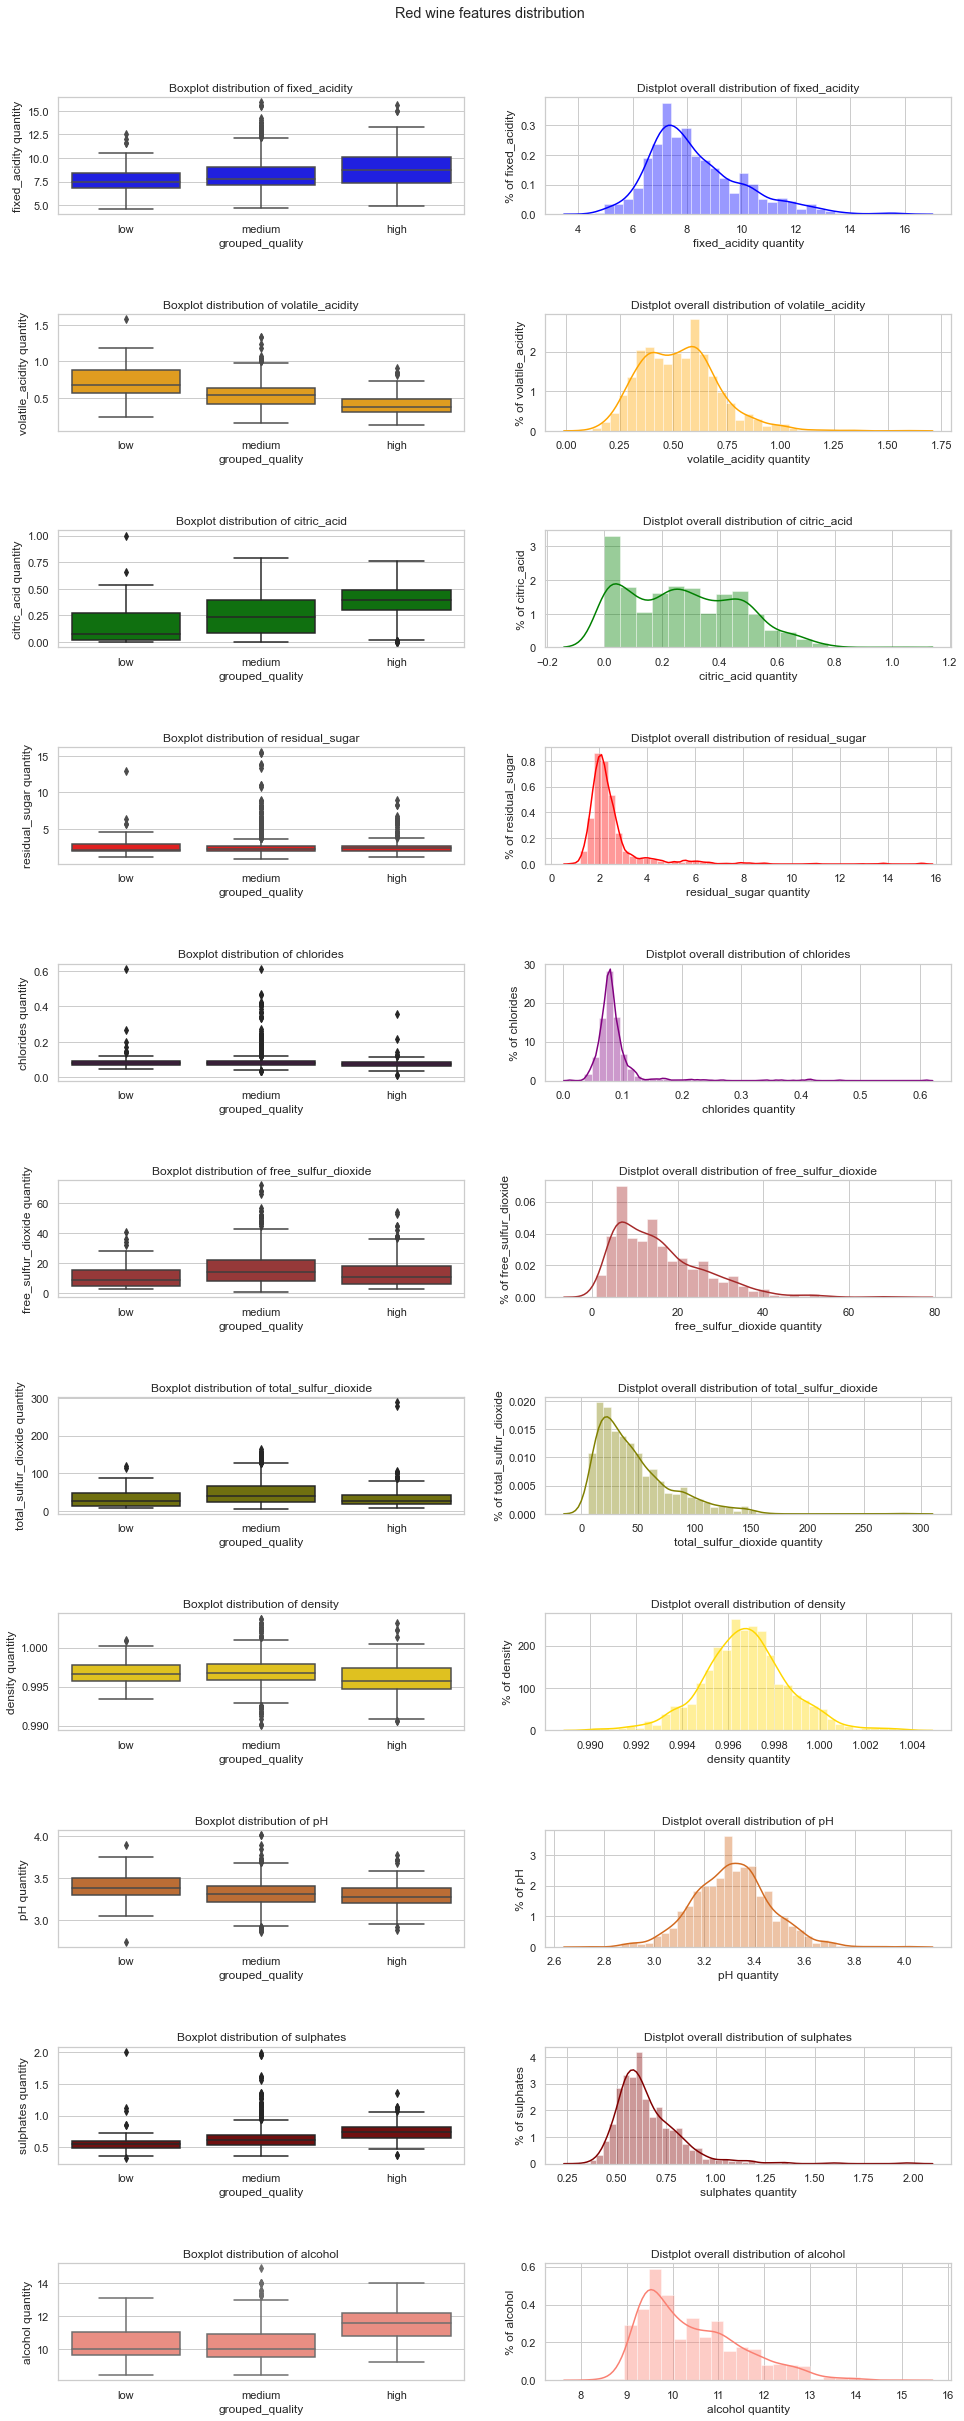

In [39]:
colors = ['blue','orange','green','red','purple','brown','olive','gold','chocolate','maroon','salmon'] # all the colors of the plots
feature_keys= ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
plotting_index = 0 # initialize
color_index = 0 #initialize
feature_index = 0 #initialize

fig, axes = plt.subplots(nrows=11, ncols=2,figsize=(16,42))   # 11 rows (one for each feature), 2 cols (first col: boxplot; second col: distplot); manually alter figsize parameter to modify output visual's size (do tgt with hspace below)
#the above line creates the exoskeletion in which to overlay the 11 boxplots

for feature_df in all_features:   # plot for each of the 11 dataframes within "all_features" list created earlier
    
    plotting_feature = feature_df.iloc[:,0] #this extracts the feature's column data
    plotting_color = colors[color_index]
    feature_name = feature_keys[feature_index]
    
    # Get each row's Axis, for each row there are 2 columns, therefore ax1 and ax2
    ax1 = axes[plotting_index][0] #and this pinpoints which exoskeleton box we go to (0 & 1 denote col 1 & 2 resp. in exoskeletion)
    ax2 = axes[plotting_index][1] #and this pinpoints which exoskeleton box we go to (0 & 1 denote col 1 & 2 resp. in exoskeletion)
    
    # plot the boxplot for each feature according to the 3 grouped_quality
    sns.boxplot(x=redwines_df.grouped_quality,y=plotting_feature,ax=ax1,color=plotting_color) # <fill in the code>
    ax1.set_title('Boxplot distribution of ' +  feature_name)
    ax1.set_xlabel('grouped_quality')
    ax1.set_ylabel(feature_name + ' quantity')
    
    # plot the distplot for each feature across ALL grouped_quality
    sns.distplot(plotting_feature,ax=ax2,color=plotting_color) # <fill in the code>
    ax2.set_title('Distplot overall distribution of ' + feature_name)
    ax2.set_xlabel(feature_name + ' quantity')
    ax2.set_ylabel('% of ' + feature_name)
    
    plotting_index += 1 #to move on to the next row in the 11x2 exoskeleton
    color_index += 1 #to change color for the next feature
    feature_index += 1 #to move on to the next feature to explore
    
plt.subplots_adjust(hspace=0.85) #adjust sizing of output visualization (use tgt with figsize parameter above)
plt.suptitle('Red wine features distribution',y=0.91)

plt.savefig('features_distribution_set.png')
plt.show()

<b>Quick statistical analysis</b>

In [40]:
redwines_df_grpby=redwines_df.groupby("grouped_quality")
compiled_feature_stats=redwines_df_grpby.describe().transpose()
display(compiled_feature_stats)
print(type(compiled_feature_stats)) #establish that the above statistics table is in a pandas dataframe format
compiled_feature_stats.to_excel("compiled_feature_stats.xlsx") #export statistics data to excel

grouped_quality            low       medium        high
fixed_acidity count  63.000000  1319.000000  217.000000
              mean    7.871429     8.254284    8.847005
              std     1.649284     1.682935    1.999977
              min     4.600000     4.700000    4.900000
              25%     6.800000     7.100000    7.400000
...                        ...          ...         ...
quality       min     3.000000     5.000000    7.000000
              25%     4.000000     5.000000    7.000000
              50%     4.000000     5.000000    7.000000
              75%     4.000000     6.000000    7.000000
              max     4.000000     6.000000    8.000000

[96 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>


<b>EDA Results Interpretation</b>

Commentary on EDA results:
<br>By grouping "quality" into 3 groups (<=4: "low quality", <=6: "medium quality", >6: "high quality"),</br>
<ol>
    <li>Wines which are perceived to be "high quality" have higher fixed_acidity, lower volatile_acidity, higher citric_acid, higher sulphate and higher alcohol % volume. This is supported by the boxplots
    <li></li>
    <li></li>
</ol>

<h3><font color="darkred"> Correlation Matrix for Red wine features </h3>

<b>Prepare dataset to apply correlation analysis</b>

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
redwines_df_corr=redwines_df.select_dtypes(include=numerics).corr()

<b>Visualizing correlation matrix</b>

In [42]:
redwines_df_corr=redwines_df_corr.style.background_gradient(cmap="coolwarm")
redwines_df_corr=redwines_df_corr.set_precision(2)
redwines_df_corr #display the correlation matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


<b>Interpreting correlation matrix</b>

The numbers in the correlation matrix illustrated above tells us the extent in which 2 features are related to one another.
These numbers are essentially correlation coefficients, which take on a value between -1 to +1 (inclusive).
<br>
-1 means both features have a strong negative correlation</br>
<br>
+1 means both features have a strong positive correlation</br>

<br>
Notable correlations include "fixed_acidity vs pH". Both these variables exhibit a negatively-inclined correlation. This is shown in Example 1 below. Another moderate correlation is "citric_acid vs pH"</br>

<br>
The correlation matrix can be a first-stop where we get a rough qualitative sensing of which potential candidate variables that we may extract for Regression Machine Learning (predictive analytics)</br>

<b>Example 1: Fixed acidity is moderately negatively correlated with pH</b>

The correlation coefficient of fixed acidity vs pH is -0.68. It makes sense scientifically that the greater the concentration of tartaric acid, the lower the pH of the red wine

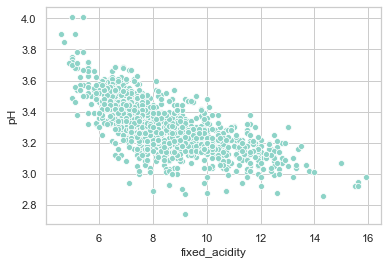

In [43]:
sns.scatterplot(data=redwines_df,x=redwines_df.fixed_acidity,y=redwines_df.pH)

<h3><font color="darkred"> Machine Learning Approach (Predictive Analytics) </h3>

<h3> Supervised ML- Regression </h3>

<b>Understanding of Regression concepts</b>
<br> Regression is well-suited for predicting a continuous variable. In this red wines analysis, as wine quality is not a "true" continuous variable (although it is numerical, it is actually categorical in nature because it can only take on integer values between 0-10), setting wine quality as the target variable for applying regression is not an ideal candidate</br>
<ul>
    <li> Per our EDA above, pH is an ideal target variable for applying Regression</li>
    <li> Through correlation matrix, we can see that fixed_acidity (-0.68), citric_acid (-0.54), density (-0.34) and chlorides (-0.27) can be good features (independent variables) to run a multi-variate regression prediction to predict target variable (dependent variable; which is pH of red wine) </li>
    <li> Before confirming these 4 features as the independent variables, we need to detect for multi-collinearity and drop variables that exhibit multi-collinearity. This may be done and observed visually using a Pearson correlation grid</li>
    <li>The main reason for dropping variables that exhibit multi-collinearity is because independent variables (i.e the x values/features) should be independent from one another. An extreme analogy would be we have a variable x1. We then change its unit of measurement and call that as x2. However, x1 and x2 are derivations of one another and they are not independent with one another. If a modeller used x1 and x2 as features in predicting a y value (target variable), it wouldn't make sense.</li>
    <li> https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/ is a good link that elaborates on multi-collinearity</li>
    <li> In our case, fixed_acidity, citric_acid, density and chlorides do not seem to have a high correlation coefficient between each other to warrant dropping any of these potential x variables, hence we proceed</li>
</ul>

<h3><font color="darkred"> Applying Regression to predict pH of red wine </h3>

<b>Data preparation for Regression</b>

In [44]:
x_features=redwines_df[["fixed_acidity","citric_acid","chlorides","density"]]
y_target=redwines_df[["pH"]]
display(x_features.head())
print(type(x_features))
display(y_target.head())
print(type(y_target))

,fixed_acidity,citric_acid,chlorides,density
0,7.4,0.00,0.076,0.9978
1,7.8,0.00,0.098,0.9968
2,7.8,0.04,0.092,0.9970
3,11.2,0.56,0.075,0.9980
4,7.4,0.00,0.076,0.9978


<class 'pandas.core.frame.DataFrame'>


,pH
0,3.51
1,3.20
2,3.26
3,3.16
4,3.51


<class 'pandas.core.frame.DataFrame'>


<b>Splitting data into training and test/validation sets</b>

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, random_state=0, test_size=0.2) #80% training / 20% test sets

<b>Creating a Linear Regression model variable and performing fitting using training set</b>

In [46]:
from sklearn import datasets, linear_model
multi_wine_linear_reg_model=linear_model.LinearRegression()
multi_wine_linear_reg_model.fit(X_train,y_train)

LinearRegression()

<b>Retrieve fitted model's intercept and coefficients</b>

In [47]:
print(multi_wine_linear_reg_model.coef_) # we will expect 4 coefficients since we used 4 variables to predict
print(multi_wine_linear_reg_model.intercept_)

[[-0.07007384 -0.04031054 -0.73121194 20.46555228]]
[-16.43052726]


The linear regression model is thus:
pH= -16.43 - 0.070(fixed_acidity) - 0.040(citric_acid) - 0.73(chlorides) + 20.47(density)

<b>Assess fitted model's performance using r^2 value</b>

<br>By parsing in the reserved 20% data (X_test) into the fitted model (as per above), we get the predicted Y_values. We then compare the predicted Y_values against the reserved 20% data (Y_test) and evaluate the closeness. The closer, the higher the r^2 value

In [48]:
from sklearn.metrics import r2_score

#parse in X_test into fitted model and storing predicted Y_values in the variable "fitted_values"
fitted_values=multi_wine_linear_reg_model.predict(X_test)

print(r2_score(y_test,fitted_values))

0.578071174402432


r^2 value of 0.58 is not really ideal. Typical r^2 values that are ideal to be used for regression prediction is >0.90

<b>Parsing in arbitrary values to predict pH value</b>

Application:
<br>
Hypothetically, another incoming red wine sample arrives with the 4 independent variables data known. We will be able to use our fitted model to predict the pH value of the red wine</br>

In [49]:
custom_fixed_acidity=7.55
custom_citric_acid=0.20
custom_chlorides=0.070
custom_density=0.9985

multi_wine_linear_reg_model.predict([[custom_fixed_acidity,custom_citric_acid,custom_chlorides,custom_density]])

array([[3.41602229]])

The predicted output is a pH= 3.42

<h3><font color="darkred"> Applying Regression to predict quality rating of red wine </h3>

By treating the quality rating as a continuous variable, regression is used to try to predict quality rating. Note that the independent variables (features) chosen below are based on the EDA results above, taking into account which feature caused an observable change in the customised-binned groups. It is acknowledged that the EDA results did not treat 'wine quality' as a continuous variable but rather customised-binning of the qualities. Another method (clustering) shall be explored later to check if there are any indicative clusters based on a new set of features

<b>Data preparation for Regression</b>

In [50]:
x_features_set_two=redwines_df[["fixed_acidity","volatile_acidity","citric_acid","sulphates","alcohol"]]
y_target_set_two=redwines_df[["quality"]]
display(x_features_set_two.head())
print(type(x_features_set_two))
display(y_target_set_two.head())
print(type(y_target_set_two))

,fixed_acidity,volatile_acidity,citric_acid,sulphates,alcohol
0,7.4,0.70,0.00,0.56,9.4
1,7.8,0.88,0.00,0.68,9.8
2,7.8,0.76,0.04,0.65,9.8
3,11.2,0.28,0.56,0.58,9.8
4,7.4,0.70,0.00,0.56,9.4


<class 'pandas.core.frame.DataFrame'>


,quality
0,5
1,5
2,5
3,6
4,5


<class 'pandas.core.frame.DataFrame'>


<b>Splitting data into training and test/validation sets</b>

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features_set_two, y_target_set_two, random_state=0, test_size=0.2) #80% training / 20% test sets

<b>Creating a Linear Regression model variable and performing fitting using training set</b>

In [52]:
from sklearn import datasets, linear_model
multi_wine_linear_reg_model_set_two=linear_model.LinearRegression()
multi_wine_linear_reg_model_set_two.fit(X_train,y_train)

LinearRegression()

<b>Retrieve fitted model's intercept and coefficients</b>

In [53]:
print(multi_wine_linear_reg_model_set_two.coef_) # we will expect 5 coefficients since we used 5 variables to predict
print(multi_wine_linear_reg_model_set_two.intercept_)

[[ 0.0567937  -1.39653773 -0.45868645  0.68391006  0.32540058]]
[2.19862973]


The linear regression model is thus:
pH= 2.20 + 0.057(fixed_acidity) - 1.40(volatile_acidity) - 0.46(citric_acid) + 0.68(sulphates) + 0.33(alcohol)

<b>Assess fitted model's performance using r^2 value</b>

In [54]:
from sklearn.metrics import r2_score

#parse in X_test into fitted model and storing predicted Y_values in the variable "fitted_values_set_two"
fitted_values_set_two=multi_wine_linear_reg_model_set_two.predict(X_test)

print(r2_score(y_test,fitted_values_set_two))

0.3095682282345269


<b>Parsing in arbitrary values to predict wine quality rating</b>

In [55]:
custom_fixed_acidity_set_two=6.9
custom_volatile_acidity_set_two=0.60
custom_citric_acid_set_two=0.26
custom_sulphates_set_two=0.72
custom_alcohol_set_two=10.5

multi_wine_linear_reg_model_set_two.predict([[custom_fixed_acidity_set_two,custom_volatile_acidity_set_two,custom_citric_acid_set_two,custom_sulphates_set_two,custom_alcohol_set_two]])

array([[5.54244653]])

The predicted output is a quality rating= 5.54

<h3><font color="darkred"> Decision Tree for Low/Medium/High red wine quality </h3>

In this dataset, the outcome variable can be 1,2,3 (corresponding to low, medium, high wine quality respectively). The rest of the columns will be the features for training this tree.

<b>Select features</b>

In [56]:
wine_features=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
df_x=redwines_df[wine_features]
df_y=redwines_df["grouped_quality"]

<b>Splitting data into training and test/validation sets</b>

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=5) #20% testing data

<b>Full tree</b>

Depth of Tree 14


[Text(264.05357142857144, 420.384, 'X[10] <= 10.45\nentropy = 0.818\nsamples = 1279\nvalue = [171, 56, 1052]'),
 Text(150.05739795918367, 391.392, 'X[9] <= 0.635\nentropy = 0.495\nsamples = 719\nvalue = [24, 36, 659]'),
 Text(88.49234693877551, 362.4, 'X[6] <= 76.0\nentropy = 0.402\nsamples = 463\nvalue = [3, 30, 430]'),
 Text(84.69642857142857, 333.408, 'X[1] <= 0.75\nentropy = 0.501\nsamples = 341\nvalue = [3, 30, 308]'),
 Text(40.33163265306123, 304.416, 'X[10] <= 9.075\nentropy = 0.402\nsamples = 292\nvalue = [3, 17, 272]'),
 Text(11.387755102040817, 275.424, 'X[7] <= 0.996\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(7.591836734693878, 246.432, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(15.183673469387756, 246.432, 'X[5] <= 11.0\nentropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]'),
 Text(11.387755102040817, 217.44, 'X[0] <= 10.15\nentropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(7.591836734693878, 188.44799999999998, 'X[7] <= 0.998\nentropy = 0.811\n

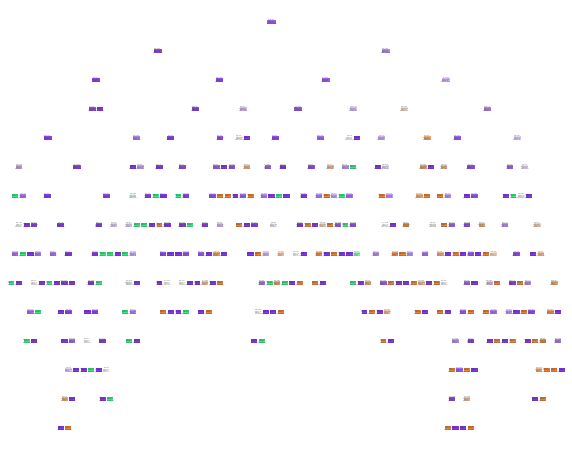

In [58]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
full_dtree=DecisionTreeClassifier(criterion="entropy")
full_dtree.fit(x_train,y_train)
print("Depth of Tree",full_dtree.tree_.max_depth) #print out depth of full tree

figure(figsize=(10,8))
tree.plot_tree(full_dtree, filled=True, impurity=True)

<b>Pruned tree</b>

Based on trial-and-error, max_depth=5 will go an accuracy greater than full tree

Depth of Tree 5


[Text(255.75, 398.64, 'X[10] <= 10.45\nentropy = 0.818\nsamples = 1279\nvalue = [171, 56, 1052]'),
 Text(119.15625, 326.15999999999997, 'X[9] <= 0.635\nentropy = 0.495\nsamples = 719\nvalue = [24, 36, 659]'),
 Text(58.125, 253.67999999999998, 'X[6] <= 76.0\nentropy = 0.402\nsamples = 463\nvalue = [3, 30, 430]'),
 Text(46.5, 181.2, 'X[1] <= 0.75\nentropy = 0.501\nsamples = 341\nvalue = [3, 30, 308]'),
 Text(23.25, 108.71999999999997, 'X[10] <= 9.075\nentropy = 0.402\nsamples = 292\nvalue = [3, 17, 272]'),
 Text(11.625, 36.23999999999995, 'entropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(34.875, 36.23999999999995, 'entropy = 0.342\nsamples = 278\nvalue = [3, 12, 263]'),
 Text(69.75, 108.71999999999997, 'X[8] <= 3.255\nentropy = 0.835\nsamples = 49\nvalue = [0, 13, 36]'),
 Text(58.125, 36.23999999999995, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(81.375, 36.23999999999995, 'entropy = 0.935\nsamples = 37\nvalue = [0, 13, 24]'),
 Text(69.75, 181.2, 'entropy = 0.0\nsam

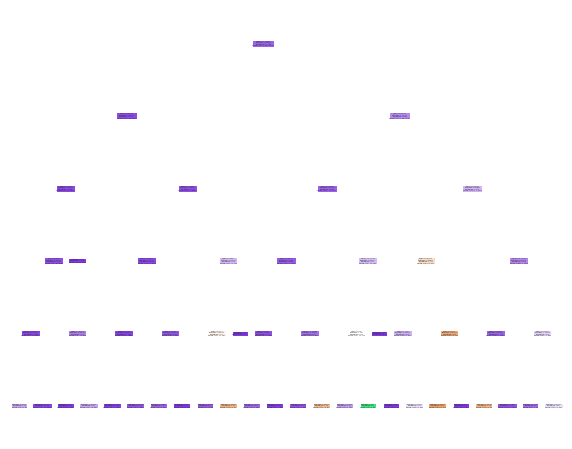

In [59]:
pruned_dtree=DecisionTreeClassifier(criterion="entropy",max_depth=5) #change depth of tree here

pruned_dtree.fit(x_train,y_train)

print("Depth of Tree",pruned_dtree.tree_.max_depth) #this tree has a max depth of x

figure(figsize=(10,8))
tree.plot_tree(pruned_dtree, filled=True, impurity=True)

<b>Accuracy scores</b>

In [60]:
print("Full tree accuracy", full_dtree.score(x_test, y_test))
print("Pruned tree accuracy", pruned_dtree.score(x_test, y_test))

Full tree accuracy 0.834375
Pruned tree accuracy 0.85625


<b>Feature Importance</b>

This will allow us to make a more informed decision of features to be selected for the subsequent clustering

<BarContainer object of 11 artists>

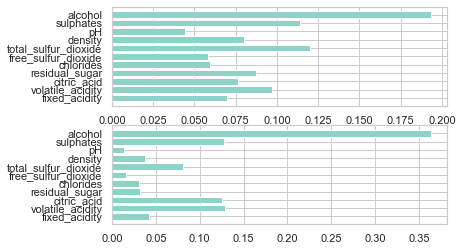

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2)

ax[0].barh(wine_features, full_dtree.feature_importances_) #full tree

ax[1].barh(wine_features, pruned_dtree.feature_importances_) #pruned tree

<b>Linking the results of feature importance back to EDA findings</b>

The feature importance horizontal bar chart shows that
<ul>
    <li> Alcohol Vol %</li>
    <li> Sulphates concentration</li>
    <li> Citric acid concentration</li>
    <li> Volatile acidity</li>
    <li> Fixed acidity</li>
</ul>
<br>are key features that affect the segmentation of the quality of red wines (in our case, low/medium/high quality). It has to be kept in mind that the judgement of 'quality' are determined by trained sensory experts who are hired to provide professional quantitative feedback of wine quality. In fact, these sensory experts are hired alot in R&D in food production as a means of introducing new product development to capture greater market share.</br>

<br>Additionally, the feature importance findings corroborates with our EDA analysis.</br>

<br>Feature importance only tells us which variables affect the wine quality (our target variable). There is no means to know whether a higher or lower magnitude of these variables will sway the interpreted quality lower or higher. That is where data visualization described in the EDA section comes in handy.</br>

<br>For example, from EDA visualizations, higher fixed_acidity sways the quality upwards to a higher wine quality.</br>

<h3><font color="darkred"> Unsupervised ML- Clustering </h3>

<b>Perform integer encoding for 'grouped_quality' column</b>

In [62]:
# Create a user-defined function to convert ordinal data to numerical data
def int_encoding(quality):
    if quality=='low':
        return 1
    elif quality=='medium':
        return 2
    else:
        return 3

In [63]:
redwines_df["grouped_quality_numeric"]=redwines_df["grouped_quality"].apply(int_encoding)
display(redwines_df.head(20))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,grouped_quality,grouped_quality_numeric
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium,2
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium,2
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high,3
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high,3
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium,2


<b>Select numerical and relevant variables only to parse into the clustering K-means ML algorithm</b>

Clustering algorithm relies on iteratively computing the stable centroids (aka cluster centres). Hence, the variables need to be numerical in nature in order for this computation to take place. Conceptually, it is similar to regression in the sense that we select variables/features we want the ML algorithm to consider in order to output the clusters (which we have to choose, i.e. the value of k)

In [64]:
#numerics = ['int64', 'float64']

#these variables are the more important features which contributed to either low/medium/high wine quality, 
#as shown by the feature importance horizontal bar chart and the earlier EDA findings
relevant_variables=["fixed_acidity","volatile_acidity","citric_acid","sulphates","alcohol"]

redwines_clustering_df=redwines_df[relevant_variables]
display(redwines_clustering_df.head())

,fixed_acidity,volatile_acidity,citric_acid,sulphates,alcohol
0,7.4,0.70,0.00,0.56,9.4
1,7.8,0.88,0.00,0.68,9.8
2,7.8,0.76,0.04,0.65,9.8
3,11.2,0.28,0.56,0.58,9.8
4,7.4,0.70,0.00,0.56,9.4


<b>Elbow plot</b>

An elbow plot is used to assess distorsion against cluster size, and to decide upon a good cluster size

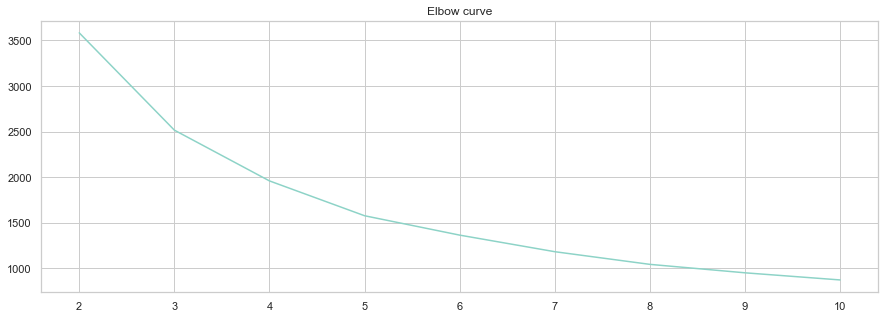

In [65]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = redwines_clustering_df # <<< Take note that this must be a numerical dataframe, since clustering requires numbers in order to compute inter-distances btw data points
distorsions = []
for k in range(2, 11): #select range of k and implement a 'for' loop to retrieve the distorsion value for that particular k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X) #do the training
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

From the generated elbow plot, a cluster of k=3 shall be chosen as the optimal cluster size.

<b>Select optimal K and Apply K-Means algorithm</b>

In [66]:
k=3 #from elbow plot, select k=3

model=KMeans(n_clusters=k,random_state=0) #create another model named "model"; this is equivalent to "kmeans" in above code
redwines_kmeans=model.fit(X) #training: redwines_kmeans is the trained model; this is equivalent to "kmeans.fit(X)" in above code

print(redwines_kmeans)

KMeans(n_clusters=3, random_state=0)


<b>Assign labels to each red wine sample</b>

The model has been trained with a cluster size k=3. Therefore, we assign this label to each red wine sample (equivalent to each row's data). Please note that cluster size k=3 is not the same as the 3 grouped_quality (low/medium/high) which was seen earlier.

In [67]:
redwines_df['label'] = redwines_kmeans.labels_ #assigning labels back to the original dataframe (which contain non-numerical variable "grouped_quality")

display(redwines_df.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,grouped_quality,grouped_quality_numeric,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,2,0


<b>Clustering analysis</b>

In [68]:
proportion=redwines_df.groupby(["label","grouped_quality"]).grouped_quality.count()/redwines_df.groupby("label").grouped_quality.count()
print(proportion)
proportion_two=redwines_df.groupby(["label","grouped_quality"]).grouped_quality.count()
print( )
print(proportion_two)

label  grouped_quality
0      low                0.040353
       medium             0.929382
       high               0.030265
1      low                0.025510
       medium             0.757653
       high               0.216837
2      low                0.050725
       medium             0.688406
       high               0.260870
Name: grouped_quality, dtype: float64

label  grouped_quality
0      low                 32
       medium             737
       high                24
1      low                 10
       medium             297
       high                85
2      low                 21
       medium             285
       high               108
Name: grouped_quality, dtype: int64


<b>Determining the centroids</b>

Here, we shall call back the original redwines_df (less the "grouped_quality" column as it is a non-numeric column) in order to understand the profile of the clusters that emerged as a result of the K-means clustering ML algorithm's output with k=3. It is up to us to label/describe the profile of each cluster, which really relies alot upon the knowledge of the person about red wines for this instance.

In [69]:
numerics = ['int64', 'float64']
print(redwines_df.dtypes)
redwines_numeric_df=redwines_df.select_dtypes(include=numerics)
display(redwines_numeric_df.head())

#Important note: The columns selected must be those that have been fed into the clustering ML algorithm for training
#In this instance, the columns that were selected for the clustering ML algorithm was denoted by the variable X (see code above)
#Additionally, the columns need to be numerical in nature (same as what was fed into the clustering ML algorithm)


cc_centroids_df = pd.DataFrame(redwines_kmeans.cluster_centers_, 
                               columns=["fixed_acidity","volatile_acidity","citric_acid","sulphates","alcohol"])

cc_centroids_df['label'] =  cc_centroids_df.index

cc_centroids_df

fixed_acidity               float64
volatile_acidity            float64
citric_acid                 float64
residual_sugar              float64
chlorides                   float64
free_sulfur_dioxide         float64
total_sulfur_dioxide        float64
density                     float64
pH                          float64
sulphates                   float64
alcohol                     float64
quality                       int64
grouped_quality            category
grouped_quality_numeric    category
label                         int32
dtype: object


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed_acidity,volatile_acidity,citric_acid,sulphates,alcohol,label
0,7.717172,0.574665,0.202967,0.637083,9.729672,0
1,10.789567,0.449593,0.468270,0.702341,10.534266,1
2,7.127536,0.512464,0.213792,0.656498,11.643680,2


<h3><font color="darkred"> Clustering Interpretation, possible business use cases: </h3>

<b>Profiling the clusters:</b>
<ul>
    <li> Cluster 1 may be characterised as red wines which are more acidic in nature. Quantitatively, this is supported by its relatively high fixed_acidity (10.79) and high citric_acid (0.47). I'm not a wine expert, but I do know that white wines are generally more acidic than red wines. As this is a red wine dataset, this Cluster 1 may be interpreted as the types of red wines that will give the most crisp taste.</li>
    <li> Cluster 0 and Cluster 2 are rather similar in profile, though Cluster 2 is a more heavy-bodied (more alcoholic) red wine than Cluster 0</li>
</ul>
<br>
<b>Food pairing applications?:</b>
</br>

Based on a [red wines pairing guide](https://www.dummies.com/food-drink/drinks/wine/finding-the-right-red-wine/),

<ul>
    <li> Cluster 1 wines are suitable to be paired with light meat and food like hamburgers, pizzas due to its more crisp, refreshing taste. </li>
    <li> Cluster 2 wines are suitable to be paired with more 'heavy' meat dishes like roast turkey, venison.</li>
</ul>

<b>Other possible applications:</b>

<ul>
    <li> Clustering results may provide a data-driven approach to categorise the manufacturer's inventory into different Stock Keeping Units (SKUs), which may make it easier for the business to track and monitor for instance, sales performance by the categorised inventory. </li>
    <li> Assuming we have data on the customers who purchase the red wines, it may be possible to trace and understand which customer profile (eg. age group, location where they live) prefers a certain cluster of red wines</li>
</ul>

<b>Possible improvements before publishing</b>

<br>a) Choose only 1 linear regression example</br>
<br>b) Try out polynomial regression model instead of linear regression to predict wine quality / pH</br>
<br>c) May want to omit 'Clustering Analysis' part in the K-means clustering? Because the results show that the 5 features that were parsed into the K-means ML algorithm gave clusters that did not have a distinct wine quality. Instead, the approach was to profile the resulting clusters as seen right above under the header 'Clustering Interpretation, possible business use cases'</br>
<br>Use jupyter nbviewer to provide a static weblink to non-programmers to view the project</br>
<br>Consider applying confidence interval estimates using the red wine samples to estimate a certain parameter</br>